# Cours

OC DS P5 - 4379436 [Explorez vos données avec des algorithmes non supervisés](https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises)

2 grands problèmes de l'apprentissage non supervisé :
* réduction de dimension
* partitionnement (clustering)

# 1.1 Comprenez pourquoi réduire la dimension de vos données

Vidéo : pourquoi réduire les dimensions :
* intelligibilité (visualisation)
* coûts d'acquisition : mémoire et traitements
* amélioration des algorithmes
* moins de paramètres, réduction du risque de surapprentissage
* lutte contre le fléau de la dimensionnalité

Nos données sont représentées sous la forme d'une matrice $X$ de dimension $n \times p$, où $n$ est le nombre d'observations et $p$ le nombre de variables les représentant. $p$ est généralement un nombre assez grand, qui peut aller jusqu'à plusieurs dizaines de milliers dans certaines applications. C'est le cas par exemple lorsqu'on traite des images en haute résolution, et que chaque variable représente un pixel de cette image.

Dans cette partie, nous allons étudier des techniques non supervisées permettant de réduire ce nombre de variables. Il s'agira de trouver $m$ variables, avec $m \lt p$, que nous allons choisir d'utiliser pour construire une nouvelle matrice $\tilde{X}$, de dimension $n \times m$, pour représenter nos données.

## Visualiser les données

Nous pouvons assez facilement représenter des données en 2 ou 3 dimensions. Mais au-delà, on est obligé de regarder les variables paire par paire (ou triplet par triplet). Ça devient assez vite difficile, voire impossible quand le nombre de dimensions augmente. Si l'on pouvait représenter nos données avec 2 ou 3 dimensions seulement, ce serait beaucoup plus simple !

## Réduire les coûts

Si nous pouvons représenter nos données en quelques dimensions, cela fait aussi moins d'informations à stocker, ce qui réduit le **coût en espace mémoire**.

Par ailleurs, avoir moins de variables réduit la complexité des algorithmes d'apprentissage que nous pouvons utiliser, et donc les **temps de calcul**.

Enfin, si certaines variables sont inutiles, il n'est pas nécessaire de les obtenir pour de nouvelles observations : cela peut réduire le **coût d'acquisition** des données.

## Améliorer la qualité des modèles d'apprentissage

En utilisant moins de variables, on peut construire des modèles avec moins de paramètres, donc plus simples, ce qui est généralement préférable pour **éviter le surapprentissage**.

De plus, **les variables non pertinentes peuvent induire l'algorithme d'apprentissage en erreur**. Prenons comme exemple l'algorithme des plus proches voisins, qui associe à une observation la même étiquette que celle de la majorité des $k$ points d'entraînement les plus proches. Si l'on utilise la distance euclidienne, toutes les variables comptent autant dans le calcul des plus proches voisins. Mais si l'une de ces variables n'est pas pertinente, elle peut changer la définition du plus proche voisin, et introduire du bruit dans le modèle.

![](https://user.oc-static.com/upload/2017/05/11/14945111329723_P1C1-2.png)

En utilisant les deux dimensions, les 3 plus proches voisins de l'étoile sont majoritairement bleus. En utilisant seulement la variable en abscisse, les 3 plus proches voisins sont majoritairement orange. Si la variable en ordonnée n'est pas pertinente, elle fausse l'algorithme.

Enfin, le **fléau de la dimension** (*curse of dimensionality*, en anglais) est le terme que nous utilisons pour qualifier le fait qu'il est très difficile de faire de l'apprentissage en haute dimension. En effet, en haute dimension, on a besoin de beaucoup plus de points pour couvrir tout l'espace. Voir aussi le [chapitre correspondant dans le cours Initiez-vous au machine learning](https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4020651-gerez-le-fleau-de-la-dimension).

Une autre façon de présenter le fléau de la dimension est de dire que toutes les observations sont loin les unes des autres, et il est très difficile de trouver ce qu'elles peuvent avoir de commun ou de différent. Les méthodes ou intuitions qui marchent en petite dimension ne marchent pas nécessairement en grande dimension.

On en conclut que la réduction de dimension est nécessaire à la qualité de l'apprentissage.

Pour comprendre pourquoi je dis que toutes les observations sont loin les unes des autres, on peut se placer en dimension $p$ et regarder la proportion du volume d'un hypercube comprise à l'extérieur de l'hypersphère incrite dans cet hypercube.

En dimension 2, prenons un carré de côté $a = 2r$. Sa surface est $a^2 = 4r^2$. Le disque inscrit dans ce carré a pour surface $\pi \frac{a^2}{4} = \pi r^2$. La surface entre ce disque et le carré vaut donc $a^2 - \pi \frac{a^2}{4} = (4 - \pi)r^2$, et couvre donc une proportion $\frac{a^2 - \pi \frac{a^2}{4}}{a^2} = \frac{(4 - \pi) r^2}{4r^2} =  1 - \frac{\pi}{4}$ de la surface du carré.

En dimension $p$, prenons un hypercube de côté $a=2r$. Son volume est $(2r)^p$. Le volume d'une sphère de rayon $r$ est donné par $\frac{(\pi r^2)^q}{q \Gamma(q)}$, avec $q = \frac{p}{2}$. Par conséquent, la proportion qui nous intéresse vaut : $1 - \frac{2 r^p \pi^{p/2}}{p \Gamma(p/2) 2^p r^p} = 1 - \frac{\pi^{p/2}}{p \Gamma(p/2) 2^{p-1}} = 1 - \left(\frac{\pi}{4}\right)^q \frac{1}{q \Gamma(q)}$, qui tend vers 1 lorsque $p$ tend vers l'infini.

**Note** - La fonction $\Gamma$ est une généralisation de la factorielle : si $N$ est un entier, $\Gamma(N) = (N-1)!$.

![](https://user.oc-static.com/upload/2017/05/11/1494511177223_P1C1-3.png)
Ici en dimension 3, on considère la proportion du volume du cube de côté a=2r  située à l'extérieur de la sphère de rayon r inscrite dans ce cube.

## Résumé

Réduire la dimensionalité des données, c'est-à-dire le nombre de variables utilisées pour les représenter, permet :
* de **faciliter la visualisation** des données ;
* de **réduire les coûts** de calcul, de stockage et d'acquisition des données ;
* d'**améliorer l'apprentissage** en construisant des **modèles moins complexes**, en éliminant les variables non pertinentes qui pourraient **fausser les prédictions** et enfin en réduisant le problème du **fléau de la dimensionalité**.

Dans la suite de cette partie, nous allons voir des techniques linéaires de réduction de dimension non supervisées.

**Note** - Lorsque les données sont *étiquetées*, il existe de nombreuses autres techniques permettant de réduire leur dimension. Certaines, comme la LDA (analyse discriminante linéaire, sur laquelle vous pouvez en lire plus [**ici (en anglais : ressource de haute qualité)**](https://sebastianraschka.com/Articles/2014_python_lda.html), sont des extensions des techniques d'*extraction de variables* dont nous allons parler dans cette partie : il s'agit de créer un petit nombre de nouvelles variables par lesquelles représenter les données. D'autres sont des techniques de *sélection de variables* : il s'agit non pas de construire de nouvelles variables, mais d'éliminer les variables les moins informatives.

# 1.2 Calculez les composantes principales de vos données

Vidéo : ACP
* Simple et efficace
* Trouver une nouvelle base orthonormée
* Qui maximise la variance des données projetées
* NB - c'est une révision du chapitre ??? du cours ???
* Mais un bon complément un chouïa plus formel

## Analysez les composantes principales de vos données

Dans ce chapitre, nous allons parler d'une méthode très utilisée pour réduire la dimension d'un jeu de données : l'analyse en composantes principales, ou ACP. On parle aussi souvent de PCA, de son nom anglais Principal Components Analysis.

### Objectif : maximiser la variance

Le but d'une analyse en composantes principales est de trouver une nouvelle base orthonormée dans laquelle représenter nos données, telle que la variance des données selon ces nouveaux axes soit maximisée.

![](https://user.oc-static.com/upload/2017/05/11/14945147458345_P1C2-1.png)
*Variance des données*

La variance des données selon l'axe orange est grande. Si on projette les points sur cet axe, ils auront tous des coordonnées différentes ; en utilisant cet axe comme unique dimension, on réduit la dimension de nos données (de 2 à 1) mais on continue à pouvoir distinguer les points les uns des autres.

## Calculer les composantes principales

Supposons que nous ayons $p$ variables : chaque observation est représentée par un vecteur dans $\mathbb{R}^p$, et nous avons $n$ observations rassemblées dans une matrice $X \in \mathbb{R}^{p \times n}$.

Commençons par chercher *une* nouvelle direction, à savoir un vecteur $\bf{w_1} \in \mathbb{R}^p$, de norme 1, tel que la variance de nos données projetées sur cette direction soit maximale. La projection des données $X$ sur $\bf{w}$ est $\bf{z_1} = \bf{w_1}^\top X$.

**Attention** - Dans ce qui suit, nous allons supposer que $X$ est *centrée*, c'est-à-dire que la moyenne de ses colonnes est 0. Si ce n'est pas le cas, on peut utiliser la transformation $\tilde X = X - \mu$ où $\mu$ est un vecteur contenant la moyenne de chaque colonne (variable).

La variance de $\bf{w_1}^\top X$ est égale à $\mathbb{E}[(\bf{w_1}^\top X - \mathbb{E}[\bf{w_1}^\top X])^2]$, soit, comme $\mathbb{E}[\bf{X}] = 0$ (les données sont centrées), $\bf{w_1}^\top \mathbb{E}[X X^\top] \bf{w_1}$.

Appelons $\Sigma$ la matrice de taille $p \times p$ égale à $\bf{X} \bf{X}^\top$. C'est la matrice de covariance des données et une estimation de $\mathbb{E}[\bf{X} \bf{X}^\top]$.

Nous cherchons donc $\bf{w_1}$ tel que :
* $\bf{w_1}^\top \Sigma \bf{w_1}$ est maximale
* $||\bf{w_1}|| = 1$

$\Sigma$ est, par construction, une matrice symétrique définie positive. Elle est donc diagonalisable par un changement de base orthonormé : $\Sigma = Q^\top \Lambda Q$, où $\Lambda \in \mathbb{R}^{p \times p}$ est une matrice diagonale dont les valeurs diagonales sont les valeurs propres de $\Sigma$, qui sont toutes positives.

Nous avons donc $\bf{w_1}^\top \Sigma \bf{w_1} = \bf{w_1}^\top Q^\top \Lambda Q \bf{w_1} = (Q \bf{w_1})^\top \Lambda (Q \bf{w_1})$

Posons $\bf{v} = Q \bf{w_1}$; nous cherchons à maximiser $\sum_{j=1}^p v_j^2 \lambda_j$. Comme $||\bf{w_1}|| = 1$ et que $Q$ est orthonormée, $||\bf{v}|| = 1$ et donc $\sum_{j=1}^p v_j^2=1$. La somme $\sum_{j=1}^p v_j^2 \lambda_j$ est donc maximisée pour un vecteur $\bf{v}$ qui a une seule entrée à 1 et les autres à 0, l'entrée à 1 étant pour la valeur maximale des   $\lambda_j$, autrement dit **la plus grande valeur propre de $\Sigma$**.

Par conséquent, $\bf{w_1}$ est **le vecteur propre correspondant à la plus grande valeur propre de $\Sigma$.** C'est la **première composante principale de X**.

La **deuxième composante principale de X** doit vérifier les mêmes critères que $\bf{w_1}$ : être de norme 1 et maximiser $\bf{w_2}^\top \Sigma \bf{w_2}$, mais lui est orthogonale. Il s'agit donc du vecteur propre de $\(\Sigma\)$ correspondant à sa **deuxième plus grande valeur propre**.

Et ainsi de suite pour les autres composantes principales.

Nous pouvons donc utiliser comme nouvelles dimensions **la base formée par les vecteurs propres de la matrice de covariance des données**.

**Remarque** - Il est possible d'obtenir cette base directement en calculant la décompostion en valeurs singulières (ou SVD) de $X$, $X = U D V^\top$ avec $U \in \mathbb{R^{p \times p}}$ orthogonale, $V \in \mathbb{R^{n \times n}}$ orthogonale, et $D \in \mathbb{R}^{p \times n}$ diagonale.

Les valeurs singulières de $X$, à savoir les entrées de $D$, sont les racines carrées des valeurs propres de $\Sigma$, tandis que les vecteurs singuliers de $X$ sont les vecteurs propres de $\Sigma$.

En effet, $X X^\top = U D V^\top V D^\top U\top = U D^2 U^\top$.

L'intérêt d'utiliser une SVD de $X$ plutôt qu'une décomposition en valeurs propres de   $X X^\top$ est la stabilité numérique des méthodes implémentant la première.

## Comment choisir le nombre de composantes principales ?

La méthode que nous venons de décrire nous permet de construire autant de composantes principales que $\Sigma$ a de vecteurs propres, soit autant que le nombre de descripteurs $p$ de nos données. Nous n'avons pas encore réduit la dimension de nos données.

Pour ce faire, nous allons regarder la proportion de variance expliquée par chacune des composantes principales.

La variance totale du jeu de données est donnée par la somme des termes diagonaux de la matrice de covariance $\Sigma$ (autrement dit la somme des variances de toutes les variables), soit sa trace. Or $Tr(\Sigma) = \lambda_1 + \lambda_2 + \dots + \lambda_p$.

La variance totale est donnée par $\lambda_1 + \lambda_2 + \dots + \lambda_p$, et celle expliquée par les $k$ premières composantes principales, par $\lambda_1 + \lambda_2 + \dots + \lambda_k$. La proportion de variance expliquée par les $k$ premières composantes principales est donc $\frac{\lambda_1 + \lambda_2 + \dots + \lambda_k}{\lambda_1 + \lambda_2 + \dots + \lambda_p}$

Nous pouvons maintenant regarder comment cette proportion évolue en fonction du nombre de composantes, et construire ce qu'on appelle en anglais un ***scree plot***. Ce graphique présente la proportion de variance expliquée par la $k$-ième composante principale, ou par les $k$ premières composantes principales, en fonction de $k$.

On peut l'utiliser pour choisir :
* le nombre de composantes principales qui explique un pourcentage de la variance que l'on s'est initialement fixé (par exemple, 90 %) ;
* le nombre de composantes principales correspondant au « coude » du graphe, à partir duquel ajouter une nouvelle composante principale ne fait pas grande différence.

<figure id="r-6814070" data-claire-element-id="31539917"><img id="r-6814068" data-claire-element-id="30559936" src="https://user.oc-static.com/upload/2020/01/20/15795446394714_scree_plot.png" alt="le pourcentage de variance expliqué par chacune des composantes principales. À partir de 5 composantes principales, ajouter une composante n'est pas très informatif." />
<figcaption>Le pourcentage de variance expliqué par chacune des composantes principales. À partir de 5 composantes principales, ajouter une composante n'est pas très informatif.</figcaption></figure>

<figure id="r-6814081" data-claire-element-id="31539919"><img id="r-6814079" data-claire-element-id="30559958" src="https://user.oc-static.com/upload/2020/01/20/1579544692388_scree_plot_cum.png" alt="le pourcentage cumulé de variance expliqué par chacune des composantes principales. Si on se fixe une proportion de variance expliquée de 95%, on peut se contenter de 9 composantes principales." /><figcaption>Le pourcentage cumulé de variance expliqué par chacune des composantes principales. Si on se fixe une proportion de variance expliquée de 90 %, on peut se contenter de 5 composantes principales.</figcaption></figure>

Une autre possibilité consiste à utiliser seulement deux ou trois composantes pour visualiser les données.

**Remarque** - Un exemple de ce que peut faire une ACP : en 2008, John Novembre et ses collègues ont publié une analyse en composantes principales des génomes de 1 387 Européens. La projection des données sur ces deux dimensions correspond assez bien à... la carte de l'Europe ! Ce résultat a été publié [**dans la revue Nature**](https://www.nature.com/nature/journal/v456/n7218/full/nature07331.html).

<figure id="r-4448469" data-claire-element-id="31539922"><img id="r-4448467" data-claire-element-id="7893322" src="https://user.oc-static.com/upload/2017/05/11/14945141781365_P1C1-4.png" alt="Les deux premières composantes principales des génomes de 1387 Européens correspondent à... une carte de l'Europe" /><figcaption>Les deux premières composantes principales des génomes de 1 387 Européens correspondent à... une carte de l'Europe</figcaption></figure>

**Remarque** - Vous trouverez plus de détails par exemple sur [**ce billet de *Science Étonnante***](https://sciencetonnante.wordpress.com/2011/05/16/comment-nos-genes-trahissent-nos-origines)


## Résumé

* Les composantes principales forment une base orthonormée et sont construites pour que les données aient une variance maximale selon ces nouveaux axes.
* Les composantes principales sont en fait les vecteurs propres de la matrice de covariance des données, classés par ordre décroissant de valeur propre correspondante.
* Pour choisir le nombre de composantes à utiliser, on regarde la proportion de la variance totale expliquée par k composantes.

# 1.3 TP – ACP d’un jeu de données sur les performances d’athlètes olympiques

Nous allons maintenant faire une analyse en composantes principales des performances d'athlètes olympiques au décathlon.

**Info** - Vous pouvez télécharger les données depuis l'URL suivante : http://factominer.free.fr/factomethods/datasets/decathlon.txt

Ce jeu de données contient 41 entrées, qui décrivent chacune les performances d'un athlète à une compétition de décathlon. Nous allons faire une ACP des dix variables décrivant les performances à chacune des épreuves du décathlon (100 mètres, saut en longueur, lancer de poids, saut en hauteur, 400 mètres, 110 mètres haies, lancer de disque, saut à la perche, javelot, et 1 500 mètres).

In [41]:
# Quizz question 8
print(0.73517866**2 + 0.6778734**2)
print(0.6778734**2 + 0.73517866**2)
print(0.82192562**2 + 0.56959484**2)
print(0.56959484**2 + 0.82192562**2)
data = [[1, 1], [3, 1], [1, 2], [2, 0]]
display(data)
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler(with_std=False).fit(data)
data_scaled = std_scale.transform(data)
display(data_scaled)
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(data_scaled)
print(pca.explained_variance_ratio_)
display(pca.components_)
data_projected = pca.transform(data_scaled)
display(data_projected)

1.0000000085469556
1.0000000085469556
1.00000000656701
1.00000000656701


[[1, 1], [3, 1], [1, 2], [2, 0]]

array([[-0.75,  0.  ],
       [ 1.25,  0.  ],
       [-0.75,  1.  ],
       [ 0.25, -1.  ]])

[0.7248422 0.2751578]


array([[-0.82192562,  0.56959484],
       [ 0.56959484,  0.82192562]])

array([[ 0.61644421, -0.42719613],
       [-1.02740702,  0.71199355],
       [ 1.18603905,  0.39472949],
       [-0.77507624, -0.67952691]])

In [43]:
from sklearn.decomposition import PCA
import numpy as np
data = np.array([[1, 3, 1, 2], [1, 1, 2, 0]]).T
pca = PCA(n_components=2)
pca.fit(data)
display(pca.components_)

# Quizz piégeux comme tous les précédents : j'ai fait 6 sur 8
# et je ne suis pas d'accord avec la fausseté de l'assertion 4 de la question 5 :
# on a bien découvert des classes de sportifs (TP).
# Même si ce n'est pas du clustering, on pressent bien des classes au moment de l'interprétation
# Notamment des corrélations (vecteurs d'origine avec distance angulaire faible)

array([[-0.82192562,  0.56959484],
       [ 0.56959484,  0.82192562]])

In [1]:
import pandas as pd

# charger les données
data = pd.read_csv('decathlon.txt', sep='\t')

# éliminer les colonnes que nous n'utiliserons pas
my_data = data.drop(['Points', 'Rank', 'Competition'], axis=1)

# transformer les données en array numpy
X = my_data.values

Rappelez-vous : nous avons fait l'hypothèse que les données étaient centrées. Nous allons donc commencer par les standardiser.

In [2]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

## Calcul des composantes principales

Calculons maintenant les deux premières composantes principales :

In [3]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)

PCA(n_components=2)

## Pourcentage de variance expliquée

`pca.explained_variance_ratio_` nous donne le pourcentage de variance expliquée par chacune des composantes.

In [4]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.32719055 0.1737131 ]
0.5009036561090068


La première composante explique environ un tiers de la variance observée dans les données, et la deuxième 17.3 %. Au total, ces deux composantes expliquent 50 % de la variance totale, en utilisant seulement un cinquième des dimensions initiales.

Nous pouvons représenter chaque athlète/compétition selon ces deux dimensions uniquement, et colorer chacun des points correspondants en fonction du classement de l'athlète lors de cette compétition.

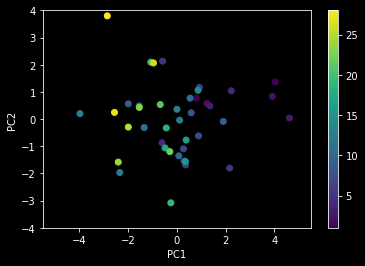

In [10]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1],
    # colorer en utilisant la variable 'Rank'
    c=data.Rank)

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()

Données projetées sur les deux premières composantes principales et colorées par classement final.

Les bonnes performances (points bleu foncé) sont plutôt situées dans la partie droite du graphe (PC1 > 0) et les moins bonnes (points jaunes) plutôt dans la partie gauche (PC1 < 0).

## Contribution de chaque variable aux composantes principales

Pour mieux comprendre ce que capturent ces composantes principales, nous pouvons utiliser `pca.components_`, qui nous donne les coordonnées des composantes principales dans l'espace initial (celui à 10 variables). Nous allons afficher, pour chacune des 10 performances, un point dont l'abscisse sera sa contribution à la première PC, et l'ordonnée sa contribution à la deuxième PC.

(-0.7, 0.7)

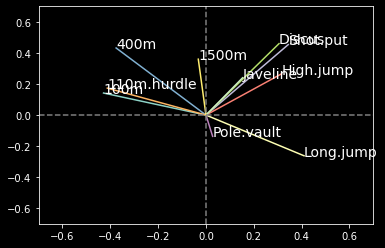

In [12]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y]) #, color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, data.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])

Contribution de chaque variable à chacune des deux composantes.

Les variables qui ont une contribution négative à la première composante principale correspondent aux disciplines pour lesquelles une bonne performance est représentée par un petit nombre (temps de course), et inversement pour les variables ayant une contribution positive. Cette composante permet de séparer les athlètes qui ont de très bonnes performances de ceux qui sont (relativement !) plus mauvais dans toutes les disciplines, comme nous l'avions remarqué.

La deuxième composante principale permet de séparer les athlètes plus forts (bonnes performances aux lancers) et moins endurants (basse performance aux 400 m et 1 500 m) des autres.

Ce graphique nous permet aussi d'observer que certaines variables sont très corrélées, comme `Discus` (performance au lancer de disque) et `Shot put` (performance au lancer de poids).

## Résumé

L'ACP nous a permis de :
* représenter les données en deux dimensions ;
* établir des profils des athlètes ;
* mettre au jour des corrélations entre des variables.

# 1.4 Cherchez les variables latentes qui expliquent vos données

Dans la plupart des cas, les variables que nous utilisons pour représenter nos données correspondent à un nombre assez grand de quantités que l'on peut facilement mesurer sur ces données. Par exemple, on représente une image par les valeurs RGB de chacun de ses pixels ; ou les goûts d'un client par l'ensemble des produits qu'il a achetés.

Cependant, le phénomène que l'on cherche à expliquer pourrait souvent être prédit à partir d'un *plus petit nombre de variables*, mais qui sont elles plus difficiles à mesurer. Par exemple, plutôt que l'ensemble de ses transactions, une seule variable qui décrit si un client est végétarien ou non serait certainement très informative pour décider s'il faut lui proposer des bons de réduction pour le rayon charcuterie.  

La description « accessible » que nous avons de notre client, à savoir la liste de ses achats, est une fonction de cette variable (végétarien ou non) qui nous est *cachée*. On parle aussi souvent de **variable latente**. On peut considérer que le but de la réduction de dimension est de retrouver les variables cachées qui décrivent au mieux nos données, à partir des **variables observées** qui nous sont accessibles.

# L’ACP est une factorisation de la matrice des données

Soit $X \in \mathbb{R}^{p \times n}$ représentant $n$ observations en $p$ dimensions. Fixons-nous un nombre $K$ de composantes principales calculées par une ACP. Ces $K$ composantes peuvent être représentées par une matrice $W \in \mathbb{R}^{p \times K}$. Ainsi, la représentation *réduite* des $n$ observations dans le nouvel espace de dimension $K$ est donnée en projetant $X$ sur les colonnes de $W$, autrement dit par $H = W^\top X$.

La matrice $H \in \mathbb{R}^{K \times n}$ peut être interprétée comme la représentation *latente* de nos données, celle qu'on a cherché à découvrir grâce à l'ACP.

Comme les colonnes de W, étant les vecteurs propres de $X X^\top$, sont des vecteurs orthonormés, on peut écrire   $X = W H$. On a donc _factorisé_ la matrice de données $X$ en deux termes : $W$ qui définit de nouvelles dimensions, et $H$, que l'on appelle parfois les ***facteurs*** de $X$ (« *factors* », en anglais), qui est la représentation latente des données.

# Modélisation des relations de covariance entre les variables : l’analyse factorielle

Considérons maintenant que nos données, c'est-à-dire les observations $x^{{1}}, x^{{2}}, \dots x^{{n}}$ qui forment les colonnes de $X$, sont générées par un modèle 

$$x^{{i}} = W h^{{i}} + \epsilon$$

où $h^{{i}} \in \mathbb{R}^K$ est une représentation latente de $x_i$ et $\epsilon$ du bruit gaussien : $\epsilon \sim \mathcal{N}(0, \Psi)$.

Supposons les données centrées en 0 : alors la moyenne de $x$, et donc de $Wh$, est 0, et sa covariance est celle de $Wh$, à savoir $WW^\top$, plus celle de $\epsilon$.

$$x \sim \mathcal{N}(0, W W^\top + \Psi)$$

Si on considère que la covariance de $\epsilon$ est isotropique, autrement dit que $\Psi = \sigma^2 I$, où $I$ est la matrice identité. C'est cette formulation que l'on appelle **ACP probabiliste**, ou *probabilistic PCA*, en anglais.

Plus généralement, supposons maintenant que la matrice de covariance du bruit $\Psi$ soit une matrice diagonale quelconque : $\Psi = \text{diag}(\psi_1, \psi_2, \dots, \psi_p)$. Selon ce modèle, les variables observées $x_j,j=1, \dots, p$ sont *conditionnellement indépendantes* étant données les valeurs des variables latentes $h_k,k=1, \dots, K$. Ainsi, les variables latentes expliquent les corrélations entre les variables observées, tandis que chaque $\psi_j$ décrit la variance spécifique à la variable $x_j$ correspondante.

On peut alors utiliser les données pour estimer les valeurs de $\Psi$ et $W$ par *maximum de vraisemblance*. C'est ce que l'on appelle l'**analyse factorielle**.

ℹ Maximum de quoi ? L'estimation de paramètres par maximum de vraisemblance consiste à trouver les valeurs des paramètres qui maximisent... la vraisemblance, c'est-à-dire la probabilité d'obtenir les données que l'on a observées, étant donné un choix de loi de probabilité (ici, la loi normale) et ses paramètres (ici, $\Psi$ et $W$). La page Wikipedia vous donnera plus de détails :
* [**Maximum likelihood estimation**](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)
* [**Maximum de vraisemblance**](https://fr.wikipedia.org/wiki/Maximum_de_vraisemblance)

ℹ Pour plus de détails mathématiques, on pourra se référer à l'article [“**Probabilistic Principal Component Analysis**](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/bishop-ppca-jrss.pdf)[”](https://drive.google.com/file/d/1uzKsIVj4dkJ9glZbkjNexFe2_BL5m7t9/view?usp=share_link), Journal of the Royal Statistical Society, Series B (61), 1999.

Dans l'analyse factorielle, nous ne faisons plus l'hypothèse que les nouvelles dimensions sont orthogonales. On peut ainsi en particulier se retrouver avec des dimensions dégénérées (des vecteurs colonnes de W dont toutes les entrées soient 0) et moins de dimensions qu'avec une ACP.

L'analyse factorielle est implémentée dans la classe [**`FactorAnalysis`**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html) du module [**`scikit-learn.decomposition`**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition).

### Cas des matrices non négatives : la factorisation non négative de matrices

Prenons maintenenant le cas où $X$ représente les scores donnés par des spectateurs à des films.

<figure id="r-4448954" data-claire-element-id="31540023"><img id="r-4448952" data-claire-element-id="7894562" src="https://user.oc-static.com/upload/2017/05/11/14945221225448_P1C4-1.png" alt="Un exemple de scores données par 5 spectateurs à 4 films, sur une échelle de 1 à 5." /><figcaption>Un exemple de scores données par 5 spectateurs à 4 films, sur une échelle de 1 à 5.</figcaption></figure>

Dans ce cas, une factorisation de $X \in \mathbb{R}^{p \times n}$ ($p$ films, $n$ spectateurs) sous la forme $WH$ peut s'interpréter de la façon suivante : $H \in \mathbb{R}^{K \times n}$ représente les goûts des spectateurs selon $K$ variables latentes (par exemple le genre du film, les acteurs, la période...), et $W \in \mathbb{R}^{p \times K}$ représente les films selon ces mêmes variables. Ainsi on pourrait expliquer le score donné par un spectateur à un film comme une combinaison du score donné « en interne » par le spectateur à différents aspects d'un film, et de la présence dans le film de ces mêmes aspects.

Cependant, cette interprétation est facilitée si, de même que les entrées de $X$, les entrées de $W$ et de $H$ sont toutes positives.

Dans ce cas, le problème de la réduction de dimension par factorisation de matrice est posé comme

$$\arg \min ||X - WH||_F^2 \\ W \in \mathbb{R}_+^{p \times K}, H \in \mathbb{R}_+^{K \times n}$$

ℹ $||A||_F$ dénote la **norme de Frobenius** de la matrice $A$; il s'agit simplement de la racine carrée de la somme des carrés de ses entrées, $||A||_F^2 = \sqrt{\sum_{ij} A_{ij}^2}$. Ainsi, $||X - WH||_F^2$ compare les matrices $X$ et $WH$ entrée par entrée.

On appelle ce problème la **factorisation de matrice non négative**, ou **NMF** pour « *non-negative matrix factorization* ». Ce problème peut être résolu par exemple par descente de gradient.

ℹ La **descente de gradient** est une méthode de minimisation applicable aux fonctions différentiables. Le gradient indique en effet la direction de plus forte pente de la fonction ; si on suit la direction opposée au gradient, la fonction va donc décroître. L'algorithme de descente de gradient consiste à choisir un point au hasard, y évaluer le gradient de la fonction à minimiser, se déplacer dans la direction opposée à ce gradient, et réitérer jusqu'à ce que le gradient soit (à peu près) nul et la fonction donc localement minimale. Attention : si le problème n'est pas convexe, le minimum atteint par cet algorithme peut ne pas être global (d'où le « localement » dans la phrase précédente).  Encore une fois, Wikipedia vous permettra de compléter vos connaissances sur le sujet !
* [**Gradient descent**](https://en.wikipedia.org/wiki/Gradient_descent)
* [**Algorithme du gradient**](https://fr.wikipedia.org/wiki/Algorithme_du_gradient)

Cette méthode est très intéressante pour les systèmes de recommandation, car elle s'applique aussi dans les cas où les données contiennent des valeurs manquantes. Par exemple, le deuxième spectateur n'a pas vu *Top Gun*. Quel score lui donnerait-on ? Lui recommanderait-on de regarder ce film ?

On remplace alors $||X - WH||_F^2$ par la somme sur les entrées connues de X des termes $(X_{ij} - (WH)_{ij})^2$. On obtient ainsi une décomposition $WH$ qui approxime $X$, et on peut utiliser les entrées correspondantes dans $WH$ pour *prédire* les valeurs manquantes de $X$.

La NMF est implémentée dans la classe [**`NMF`**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) du module [**`scikit-learn.decomposition`**](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition).

### Résumé

* L'ACP peut être vue comme une factorisation de la matrice de données $X=WH$, où $W$ contient les nouvelles variables et $H$ la représentation latente des données selon ces variables.
* Toute une famille de méthodes réduisent la dimension des données par une décomposition approximative, $X≈WH$.
* L'analyse factorielle et l'ACP probabiliste sont issues de modèles génératifs utilisant la factorisation de la variable aléatoire $x$ en $Wh$. Dans le cas de l'ACP probabiliste, on modélise la covariance du bruit comme étant un multiple de l'identité. Dans le cas de l'analyse factorielle, on estime la covariance du bruit indépendante dans chaque direction.
* L'ACP cherche à maximiser la variance de $X$ selon des directions orthogonales.
* L'analyse factorielle cherche à modéliser la structure de la covariance des variables observées, et ne définit pas nécessairement des axes orthogonaux.
* La NMF (factorisation non négative de matrice) s'applique à des matrices $X$ dont les entrées sont toutes positives, et force les entrées de $W$ et de $H$ à être positives également. Elle permet aussi de prédire les valeurs manquantes de $X$ (voir algorithmes de recommandation).